In [ ]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Paso 2: Cargar los datos
df = pd.read_csv('wine-clustering.csv')  # O usa tu ruta si lo subiste diferente

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

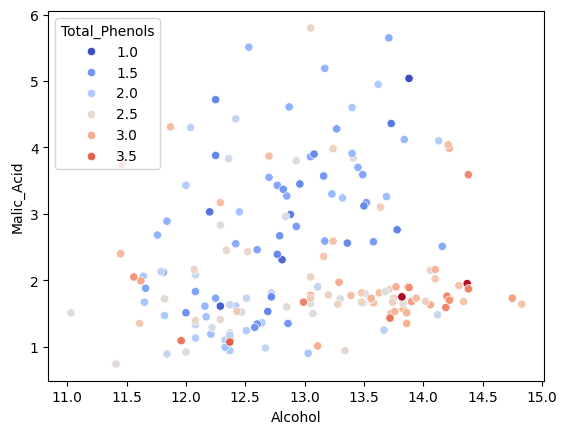

In [ ]:
import seaborn as sb
sb.scatterplot(x="Alcohol", y="Malic_Acid", data=df, hue="Total_Phenols",
               palette="coolwarm")

In [ ]:
# Paso 3: Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

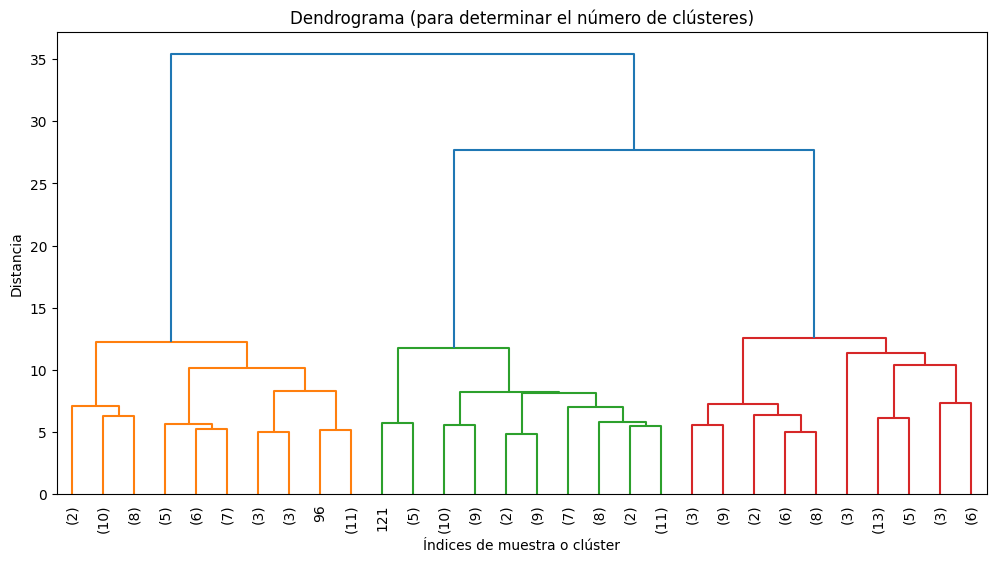

In [ ]:
# Paso 4: Visualizar dendrograma antes del clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrograma (para determinar el número de clústeres)')
plt.xlabel('Índices de muestra o clúster')
plt.ylabel('Distancia')
plt.show()

In [ ]:
# Paso 5: Clustering Jerárquico Aglomerado
n = 5
# Reemplazar 'affinity' con 'metric' o eliminar si se usa la métrica euclidiana por defecto
agg_cluster = AgglomerativeClustering(n_clusters=n, metric='euclidean', linkage='ward')
labels = agg_cluster.fit_predict(X_scaled)

In [ ]:
# Paso 6: Evaluación
silhouette = silhouette_score(X_scaled, labels)
davies = davies_bouldin_score(X_scaled, labels)
print(f'Coeficiente de Silueta: {silhouette:.4f}')
print(f'Índice Davies-Bouldin: {davies:.4f}')

Coeficiente de Silueta: 0.1867
Índice Davies-Bouldin: 1.9229


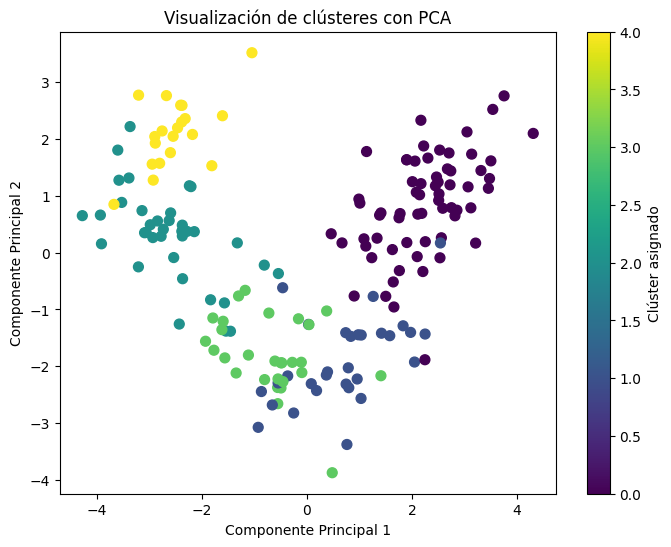

In [ ]:
# Paso 7: Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Visualización de clústeres con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Clúster asignado')
plt.show()